In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')


## Train dataset exploration: 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Types of Variables

In [4]:
# find categorical variables
categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 5 categorical variables


In [5]:
# find numerical variables
numerical = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 7 numerical variables


##### Viewing the Categorical terms :

In [6]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']    
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['PassengerId','Ticket','Name','Cabin']]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Sex
male      577
female    314
Name: Sex, dtype: int64

Frequency of Categories for variable Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


#### Detecting Missing  Values:

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

The train dataset has 12 features/variables with missing values in features: **Age** (19.86%), **Cabin** (77.10%) and **Embarked** (00.22%) <br> 

- Analysing and Assumming of the missing data: <br>
     - The **Cabin** feature has maximum missing values of about 77%. For many of the people who did not survive,the cabin they were staying in, could not be established. The people who survived could be asked for that information. <br>
      
     - The **Age** feature has missing values of about 22%.For the people who did not survive, the age they had could not be established. The people who survived could be asked for that information. <br>
      
     They have some reasaon why the data is missing, or there is some systematic missing of values, hence this falls under *Missing data Not at Random (**MNAR**) category.* <br>

   Talking about Embarked missing values:<br>
     - The **Embarked** the missing values is about 00.22% which was completely at random(**MCAR**), explained below.  

#### Outliers detection :

Text(0, 0.5, 'Fare')

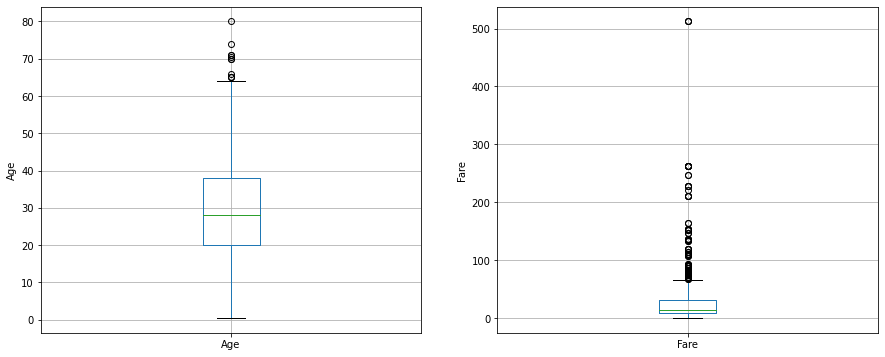

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = train.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = train.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

Text(0.5, 0, 'Fare')

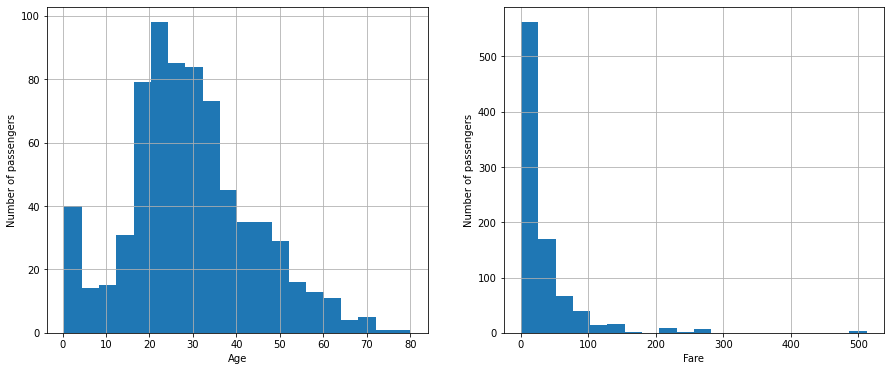

In [10]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
fig = train.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = train.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

### Analyzing the Embarked feature:

In [11]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The Passengers did survive and they were having same ticket, same Cabin, Same Fare but somehow doesn't have the Embarked data which is possible to be generated during time of buiding the dataset. Hence the Feature has random missing values.

### Analyzing Cabin feature :

In [12]:
## Creating a dummy variable, which indicates that whether cabin value is missing
train['cabin_null'] = np.where(train.Cabin.isnull(),1,0)
train.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

The above figures indicates that the missing data is more in the case of passengers not survived(=0).<br>

**There is a systematic loss of data: people who did not survive tend to have more information missing. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.**

### Analyzing the Age feature:

In [13]:
train['age_null'] = np.where(train.Age.isnull(),1,0)
train.groupby(['Survived'])['age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64

**There is a systematic loss of data: people who did not survive tend to have more information missing. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.**

### Analyzing the Fare feature :

The distribution of Fare is skewed, so in principle, we shouldn't estimate outliers using the mean plus minus 3 standard deviations methods, which assumes a normal distribution of the data.

In [14]:
# lets look at the actual percentage of passengers on the upper Fare ranges
total_passengers = np.float(train.shape[0])

print('total number of passengers: {}'.format(train.shape[0]))

print('passengers that paid more than 65: {} %'.format((
    train[train.Fare > 65].shape[0]/ total_passengers)*100))
print('passengers that paid more than 100: {} %'.format((
    train[train.Fare > 100].shape[0]/ total_passengers)*100))

total number of passengers: 891
passengers that paid more than 65: 13.019079685746352 %
passengers that paid more than 100: 5.948372615039282 %


There *is **unusual** high values of **Fares** observed*, the reason is found as follows:

In [15]:
#at the most extreme outliers
train[train.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,0


These three people have the same ticket number, indicating that they were travelling together. The Fare price in this case, 512 is the price of 3 tickets, and not one. **This is why, it is unusually high.**

#### Categorical Values : 

In [16]:
print('Number of categories in the variable Name: {}'.format(
    len(train.Name.unique())))

print('Number of categories in the variable Gender: {}'.format(
    len(train.Sex.unique())))

print('Number of categories in the variable Ticket: {}'.format(
    len(train.Ticket.unique())))

print('Number of categories in the variable Cabin: {}'.format(
    len(train.Cabin.unique())))

print('Number of categories in the variable Embarked: {}'.format(
    len(train.Embarked.unique())))

print('Total number of passengers in the Titanic: {}'.format(len(train)))

Number of categories in the variable Name: 891
Number of categories in the variable Gender: 2
Number of categories in the variable Ticket: 681
Number of categories in the variable Cabin: 148
Number of categories in the variable Embarked: 4
Total number of passengers in the Titanic: 891


In [17]:
drop_column = ['cabin_null','age_null']
train.drop(drop_column , axis =1  ,inplace = True )

## Feature Scaling and Engineering

#### Handling the Missing Values:<br>
The missing Values are in the following features,


In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
data_cleaner = [test , train]
for dataset in data_cleaner:    
    #completing missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #completing embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #completing missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the train feature
train.drop(['Ticket'], axis=1, inplace = True)
test.drop(['Ticket'] , axis=1 , inplace = True)

### Encoding

#### Cabin Feature

In [21]:
drop_column = ['Cabin']
train.drop(drop_column , axis =1  ,inplace = True )
test.drop(drop_column , axis =1  ,inplace = True )

#### Fare Feature

In [22]:
full_data = [train,test]
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare_Band'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare_Band'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare_Band'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare_Band'] = 3
    dataset['Fare_Band'] = dataset['Fare_Band'].astype(int)
    dataset.drop(['Fare' ], axis = 1 , inplace =True)

#### Age Feature

In [23]:
full_data = [test , train]
for dataset in full_data:
    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 15), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 7
    dataset['Age'] = dataset['Age'].astype(int)

#### Sex and Embarked Feature

In [24]:
full_data = [test , train]
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)


#### Droping the Name feature

In [25]:
train.drop(['Name'],axis = 1, inplace = True)
test.drop(['Name'],axis = 1, inplace = True )

#### Family Size

In [26]:
train['family_size'] = train['SibSp'] + train['Parch'] + 1 
test['family_size'] = test['SibSp'] + test['Parch'] + 1 
test['IsAlone'] = 1 
train['IsAlone'] = 1 
train['IsAlone'].loc[train['family_size'] > 1] = 0
test['IsAlone'].loc[test['family_size'] > 1] = 0 
test.drop(['SibSp' , 'Parch'], axis = 1 , inplace =True)
train.drop(['SibSp','Parch' ], axis = 1 , inplace =True)

In [27]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Fare_Band,family_size,IsAlone
0,892,3,1,5,2,0,1,1
1,893,3,0,6,0,0,2,0
2,894,2,1,7,2,1,1,1
3,895,3,1,4,0,1,1,1
4,896,3,0,3,0,1,3,0


In [28]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Embarked       0
Fare_Band      0
family_size    0
IsAlone        0
dtype: int64

## Visualizations

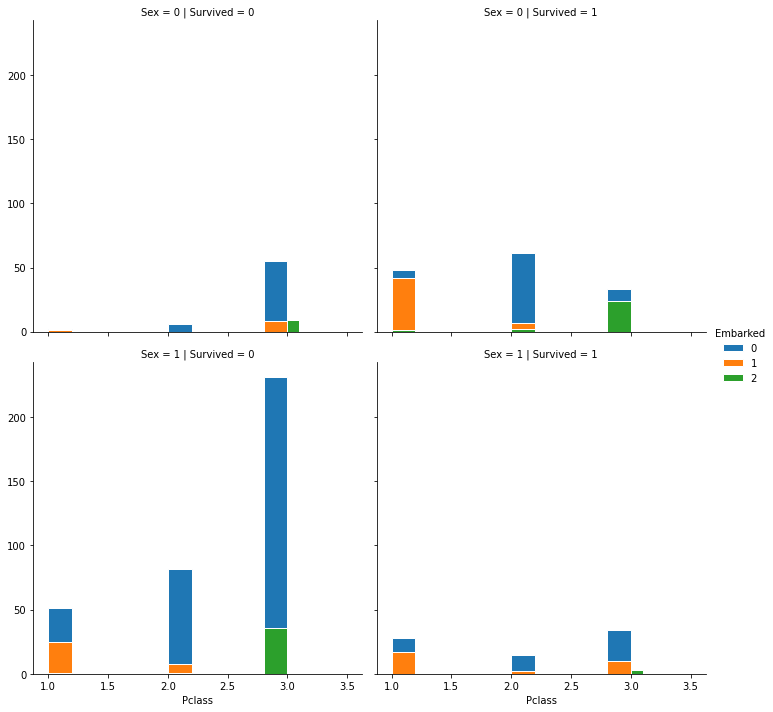

In [29]:
g = sns.FacetGrid(train, col="Survived",  row="Sex", hue = "Embarked" ,  size = 5 )
g.map(plt.hist, "Pclass" ,edgecolor = "w").add_legend()

- Observations
    - From above graph we observe that more number of females survived as compared to males. The female survivors were more from the first class and male from third class were the most to die.
    - The 3rd class people were the most affected, that is they less survived where as 1st class people survived is maximum than others. 
    - The second class has almost equal survived and  couldn't survive number of people. And also we notice many of the passengers Embarked from "S".


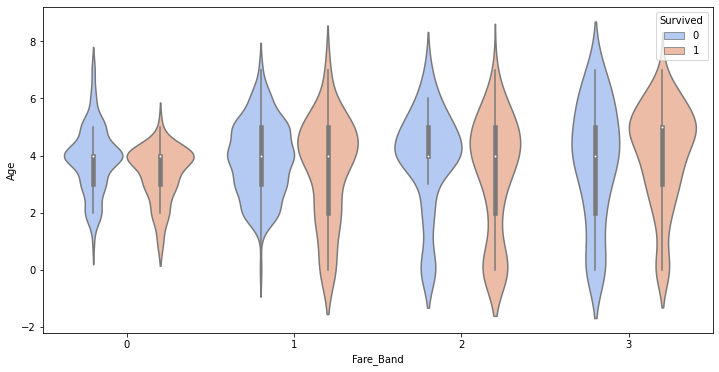

In [30]:
plt.figure(figsize = [12,6])
sns.violinplot(x="Fare_Band", y="Age", data=train, hue='Survived',palette='coolwarm')

Mostly farebands are greater at the Age Group **"4"**. Survival also has *greater area corresponding to age group **"4"**.*

In [31]:
train[['family_size', 'Survived']].groupby(['family_size'], as_index=False).mean()

,family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


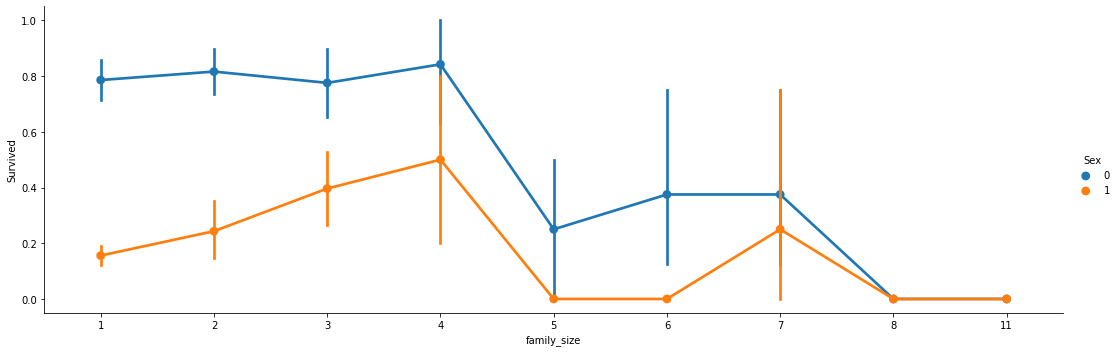

In [32]:
axes = sns.factorplot('family_size','Survived', hue = 'Sex',data=train,aspect = 3)

We find with increase in family size the survival rate decreases.

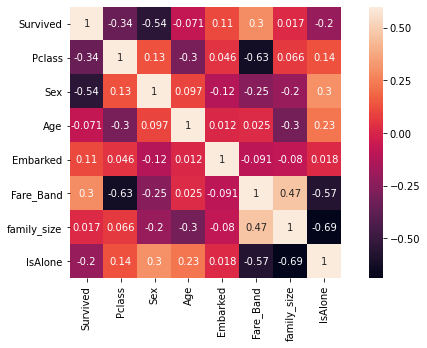

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

- Undestanding the Correlation matrix:
    -  The FareBand and Pclass are highly correlated(-0.63) although negative, next to them is FareBand and IsAlone correlation(-0.57).
    -  The Sex and Survived also have good correlation of (-0.54).
    -  But as observed IsAlone and Family_size has the largest negative correlation (-0.69) is liable as the Family size and being alone are two opposite categories.

## Predictions:

In [34]:
X = train.drop('Survived' , axis = 1 )
y = train['Survived']

In [38]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

In [39]:
X_train=X_train.drop(['PassengerId'],axis=1)
X_test = X_test.drop(['PassengerId'],axis=1)

In [40]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

79.1044776119403

In [42]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

83.5820895522388

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

78.73134328358209

In [44]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

pred_gb = gaussian.predict(X_test)

acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

77.98507462686567

In [45]:
svc = SVC()

svc.fit(X_train, y_train)

pred_svm = svc.predict(X_test)

acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

84.70149253731343

In [46]:
linear_svc = LinearSVC()

linear_svc.fit(X_train, y_train)

pred_svc = linear_svc.predict(X_test)

acc_svc = accuracy_score(y_test , pred_svc)*100
acc_svc

80.22388059701493

In [47]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

pred_dt = decision_tree.predict(X_test)

acc_dt = accuracy_score(y_test , pred_dt)*100
acc_dt

82.08955223880598

In [48]:
sgd = SGDClassifier()

sgd.fit(X_train, y_train)

pred_sgd = sgd.predict(X_test)

acc_sgd = accuracy_score(y_test , pred_sgd)*100
acc_sgd

81.71641791044776

In [49]:
gbk = GradientBoostingClassifier()

gbk.fit(X_train, y_train)

pred_gbc = gbk.predict(X_test)

acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

81.71641791044776

In [56]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM' , 'Linear SVC' , 'Decision Tree' , 'Stochastic Gradient Descent',
              'Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm , acc_svc , 
              acc_dt , acc_sgd , acc_gbc]})
models.sort_values(by='Score', ascending=False)



,Model,Score
4,SVM,84.701493
1,Random Forrest,83.582090
6,Decision Tree,82.089552
7,Stochastic Gradient Descent,81.716418
8,Gradient Boosting Classifier,81.716418
5,Linear SVC,80.223881
0,Logistic Regression,79.104478
2,K- Nearest Neighbour,78.731343
3,Naive Bayes,77.985075


In [58]:
df_test =  test.drop(['PassengerId'],axis=1)

p_l = logmodel.predict(df_test)
p_svm = svc.predict(df_test)
p_rf = random_forest.predict(df_test)
p_gbk = gbk.predict(df_test)

In [59]:
predict_combine = np.zeros((df_test.shape[0]))
for i in range(0, test.shape[0]):
    temp = p_gbk[i]+p_svm[i]
    if temp>=2:
        predict_combine[i] = 1
predict_combine = predict_combine.astype('int')

In [60]:
"""
submission = pd.DataFrame({
       "PassengerId": test["PassengerId"],
        "Survived": predict_combine
    })

submission.to_csv("submission.csv", encoding='utf-8', index=False)
"""
print()